In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


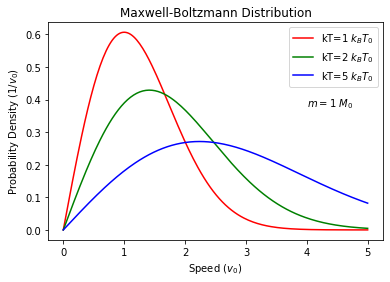

In [2]:
MAX_V = 5
M = 1
KTA = 1
KTB = 2
KTC = 5
vf = np.linspace(0,MAX_V,200)
af = (M*vf/KTA)*np.exp(-M*vf**2/(2*KTA))
bf = (M*vf/KTB)*np.exp(-M*vf**2/(2*KTB))
cf = (M*vf/KTC)*np.exp(-M*vf**2/(2*KTC))
plt.plot(vf, af, "r-",label="kT="+str(KTA)+" $k_B T_0$")
plt.plot(vf, bf, "g-",label="kT="+str(KTB)+" $k_B T_0$")
plt.plot(vf, cf, "b-",label="kT="+str(KTC)+" $k_B T_0$")
plt.xlabel("Speed ($v_0$)");
plt.ylabel("Probability Density ($1/v_0$)")
plt.legend()
plt.text(4,0.38,"$m="+str(M)+"~M_0$")
plt.title("Maxwell-Boltzmann Distribution")
plt.savefig("maxboltz.pdf", bbox_inches="tight")

In [3]:
def collide(ax, ay, bx, by, theta):
    # your code here...
    return ax, ay, bx, by    

In [4]:
def collide(ax, ay, bx, by, theta):
        ux  = (ax-bx)/2.0
        uy  = (ay-by)/2.0
        cs = cos(theta)
        sn = sin(theta)
        dax = (cs-1.0)*ux + sn*uy
        day = (cs-1.0)*uy - sn*ux
        dbx = -(cs-1.0)*ux - sn*uy
        dby = -(cs-1.0)*uy + sn*ux
        ax = ax + dax
        ay = ay + day
        bx = bx + dbx
        by = by + dby
        return ax, ay, bx, by    

In [5]:
# lab frame is CMS, incoming on x axis, 
print(np.around(collide(1,0,-1,0,0)))
print(np.around(collide(1,0,-1,0,np.pi/2.0)))
print(np.around(collide(1,0,-1,0,np.pi)))
print(np.around(collide(1,0,-1,0,3*np.pi/2)))

[ 1.  0. -1.  0.]
[ 0. -1. -0.  1.]
[-1. -0.  1.  0.]
[-0.  1.  0. -1.]


In [6]:
#lab frame is CMS, incoming on y axis
print(np.around(collide(0,1,0,-1,0)))
print(np.around(collide(0,1,0,-1,np.pi/2)))
print(np.around(collide(0,1,0,-1,np.pi)))
print(np.around(collide(0,1,0,-1,3*np.pi/2)))

[ 0.  1.  0. -1.]
[ 1.  0. -1. -0.]
[ 0. -1. -0.  1.]
[-1. -0.  1.  0.]


In [7]:
# boost on x axis, collide on y axis in CMS
print(np.around(collide(1,1,1,-1,0)))
print(np.around(collide(1,1,1,-1,np.pi/2)))
print(np.around(collide(1,1,1,-1,np.pi)))
print(np.around(collide(1,1,1,-1,3*np.pi/2)))

[ 1.  1.  1. -1.]
[ 2.  0.  0. -0.]
[ 1. -1.  1.  1.]
[ 0. -0.  2.  0.]


In [8]:
# random collision
print(np.around(collide(1.2,-2.3,3.6,-1.5,0.7),5))
print(np.around(collide(6.2,1.4,8.0,-10.2,5.2),5))

[ 1.2245  -1.43288  3.5755  -2.36712]
[ 1.5543  -2.47771 12.6457  -6.32229]


In [9]:
def calc_kt(vx, vy):
    return M*(np.mean(vx**2) + np.mean(vy**2))/2

def scale_v(vx, vy, kt):    
    mykt = calc_kt(vx,vy)
    scale = np.sqrt(kt/mykt)
    vx  = scale*vx
    vy  = scale*vy    
    return vx, vy

In [10]:
# simulation of collisions:
NGAS  = 1000
COLL  = 10000
M     = 1
KT    = 3

vx = np.random.uniform(-3,3,size=NGAS)
vy = np.random.uniform(-3,3,size=NGAS)
vx,vy = scale_v(vx,vy, KT)
print("initial kt:  ", calc_kt(vx,vy))

for i in range(COLL):
    pair = np.random.choice(NGAS,size=2,replace=False)
    ia = pair[0]
    ib = pair[1]
    theta = np.random.uniform(0,2*np.pi)
    vx[ia], vy[ia], vx[ib], vy[ib] \
    = collide(vx[ia], vy[ia], vx[ib], vy[ib], theta)         

print("final kt:  ", calc_kt(vx, vy))

initial kt:   3.0
final kt:   3.0000000000000004


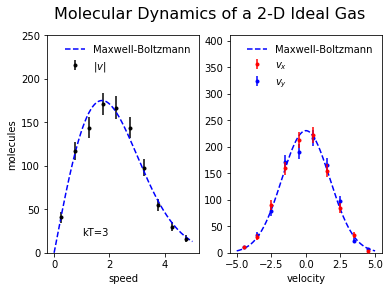

In [11]:
from scipy import stats
NBINS = 10
MAXV  = 5

kt = calc_kt(vx, vy)

v  = np.sqrt(vx**2 + vy**2)
hv,binsv  = np.histogram(v,bins=NBINS, range=(0,MAXV))
hvx,binsvx = np.histogram(vx,bins=NBINS, range=(-MAXV,MAXV))
hvy,binsvy = np.histogram(vy,bins=NBINS, range=(-MAXV,MAXV))

# calculate the center of each bin:
cbinsv = (binsv[1:]  + binsv[:-1])/2.0
cbinsvx = (binsvx[1:] + binsvx[:-1])/2.0

# calculate the Poisson uncertainty for each bin:
huncv = np.sqrt(hv)
huncvx = np.sqrt(hvx)
huncvy = np.sqrt(hvy)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Molecular Dynamics of a 2-D Ideal Gas', fontsize=16)
ax1.errorbar(cbinsv, hv, yerr=huncv, fmt="k.", label="$|v|$")
vf = np.linspace(0,5,200)
yf = (vf/kt)*np.exp(-vf**2/(2*kt))*NGAS*(binsv[1]-binsv[0])
ax1.plot(vf, yf, "b--",label="Maxwell-Boltzmann")
ax1.set_xlabel("speed")
ax1.set_ylabel("molecules")
ax1.set_ylim(0,2.5*NGAS/NBINS)
ax1.text(1,0.2*NGAS/NBINS,"kT=3")
ax1.legend(frameon=False)

ax2.errorbar(cbinsvx, hvx, yerr=huncvx, fmt="r.", label="$v_x$",zorder=3)
ax2.errorbar(cbinsvx, hvy, yerr=huncvy, fmt="b.", label="$v_y$",zorder=2)
vxf = np.linspace(-5,5,200)
yxf = stats.norm.pdf(vxf,scale=np.sqrt(kt))*NGAS*(binsvx[1]-binsvx[0])
ax2.plot(vxf, yxf,"b--",label="Maxwell-Boltzmann",zorder=1)
ax2.set_xlabel("velocity")
ax2.set_ylim(0,4.1*NGAS/NBINS)
ax2.legend(frameon=False)